In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## scatter plots of Age vs. Market value
###Ploting scatter plots for players age vs. the market value for all players, for each position and fro all layers by position using a logarithmic scale for the market values

<ipython-input-6-75ed5bf5b683>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1000x600 with 0 Axes>

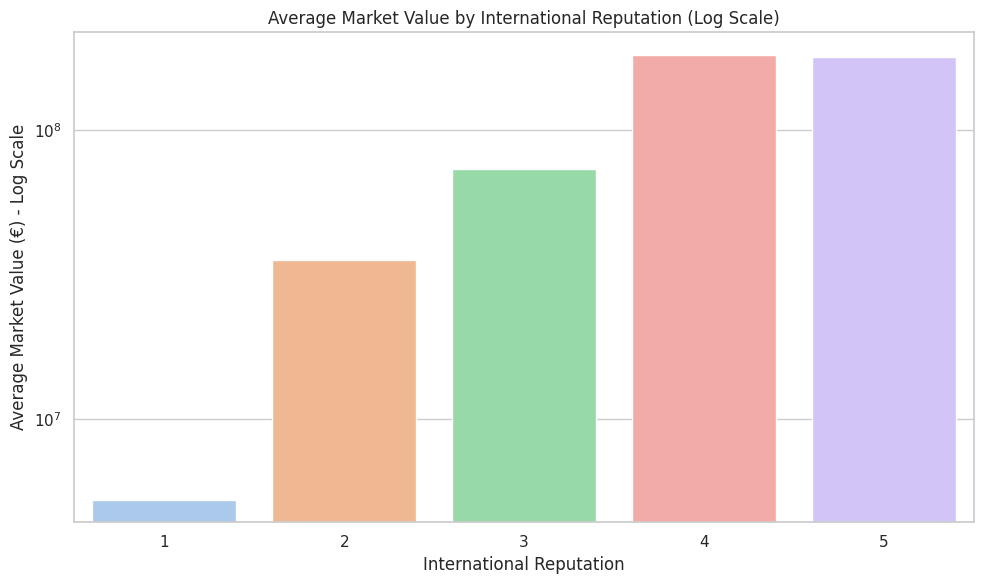

In [6]:

# Define directories
base_dir = "/content/drive/MyDrive/masters thesis ali alhaj hassan/data_scraping_and_preperation"
plot_dir = os.path.join(base_dir, "analyses and plots/plots")
os.makedirs(plot_dir, exist_ok=True)  # Ensure the directory exists

# Load the dataset
file_path = os.path.join(base_dir, "merged_data/player_summary.csv")
df = pd.read_csv(file_path)


sns.set(style="whitegrid")
# Standardize Best position names
position_map = {'G': 'GK', 'D': 'DF', 'M': 'MF', 'F': 'FW'}
df['Best position'] = df['Best position'].replace(position_map)

# Remove non-positive MarketValue before log transformation
df = df[df['MarketValue'] > 0]
df['Log_MarketValue'] = np.log10(df['MarketValue'])

# Set seaborn style
sns.set(style="whitegrid")

### A. DISTRIBUTIONS & DEMOGRAPHICS

# 1. Histogram – Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of All Players")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "age_distribution.png"))
plt.close()

### B. VALUE & PERFORMANCE (with log scale)

# 2. Box Plot – Market Value by Best Position (log scale)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Best position", y="Log_MarketValue")
plt.title("Log(Market Value) by Best Position")
plt.xlabel("Best Position")
plt.ylabel("Log(Market Value)")
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "log_market_value_by_best_position.png"))
plt.close()

plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))

# Calculate mean MarketValue grouped by International reputation
mean_values = df.groupby('International reputation')['MarketValue'].mean().reset_index()

# Bar plot of mean values
sns.barplot(
    data=mean_values,
    x='International reputation',
    y='MarketValue',
    palette='pastel'
)

# Set y-axis to log scale for clarity
plt.yscale('log')

# Titles and labels
plt.title("Average Market Value by International Reputation (Log Scale)")
plt.xlabel("International Reputation")
plt.ylabel("Average Market Value (€) - Log Scale")

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "avg_market_value_by_international_reputation_bar.png"))
plt.show()

# 4. Box Plot – Market Value by Source League (log scale)
plt.figure(figsize=(10, 6))
top_leagues = df['Source_League'].value_counts().nlargest(12).index
df_filtered = df[df['Source_League'].isin(top_leagues)]
sns.boxplot(data=df_filtered, x="Source_League", y="Log_MarketValue")
plt.title("Log(Market Value) by Source League (Top 12)")
plt.xlabel("Source League")
plt.ylabel("Log(Market Value)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "log_market_value_by_source_league.png"))
plt.close()
plt.close()


## Box plots of Age vs. Market value